In [0]:
#load libaries

import tensorflow as tf
import os

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
#show shapes (rows, pixels width, pixels length, channels - 3 means RGB)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

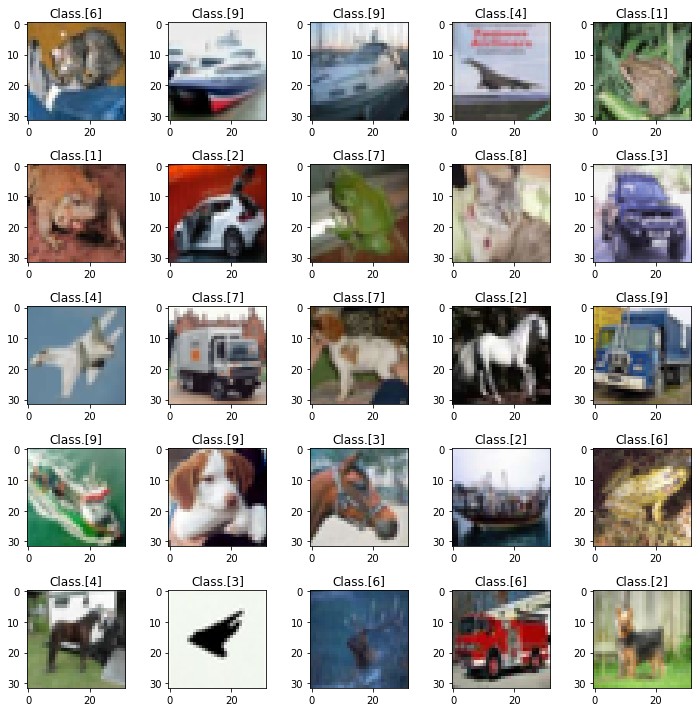

In [3]:
#visualize data
fig = plt.figure(figsize=(10,10))
for idx in range(25):
  plt.subplot(5,5, idx + 1)
  plt.imshow(X_test[idx], cmap='gray', interpolation='none')
  plt.title('Class.{}'.format(y_train[idx]))

plt.tight_layout()

In [0]:
#create an input shape

img_rows, img_cols = X_train.shape[1], X_train.shape[2]
num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

In [52]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
#normalize data - make it between 0 and 1 - in order to do that we divide the data by 255
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1 : X_test = X_test / 255

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)

In [0]:
if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [56]:
model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape),
        Conv2D(32, kernel_size=(3,3), activation = "relu"),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

        Conv2D(64, kernel_size=(3,3), activation = "relu"),
        Conv2D(64, kernel_size=(3,3), activation = "relu"),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3,3), activation = "relu"),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

        Flatten(),

        Dense(1024, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
model.fit(X_train, y_train,
          batch_size = 128, 
          epochs = 20,
          verbose = 2,
          validation_data=(X_test, y_test) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.9674 - accuracy: 0.6608 - val_loss: 0.9301 - val_accuracy: 0.6808
Epoch 2/20
 - 4s - loss: 0.9338 - accuracy: 0.6748 - val_loss: 0.8344 - val_accuracy: 0.7142
Epoch 3/20
 - 4s - loss: 0.9003 - accuracy: 0.6845 - val_loss: 0.8433 - val_accuracy: 0.7122
Epoch 4/20
 - 4s - loss: 0.8701 - accuracy: 0.6972 - val_loss: 0.8643 - val_accuracy: 0.6979
Epoch 5/20
 - 4s - loss: 0.8509 - accuracy: 0.7041 - val_loss: 0.8071 - val_accuracy: 0.7244
Epoch 6/20
 - 4s - loss: 0.8281 - accuracy: 0.7130 - val_loss: 0.8325 - val_accuracy: 0.7179
Epoch 7/20
 - 4s - loss: 0.8153 - accuracy: 0.7154 - val_loss: 0.7840 - val_accuracy: 0.7245
Epoch 8/20
 - 4s - loss: 0.7967 - accuracy: 0.7219 - val_loss: 0.7831 - val_accuracy: 0.7299
Epoch 9/20
 - 4s - loss: 0.7848 - accuracy: 0.7249 - val_loss: 0.7949 - val_accuracy: 0.7300
Epoch 10/20
 - 4s - loss: 0.7717 - accuracy: 0.7312 - val_loss: 0.7568 - val_accuracy: 0.7355
Epoch 11/20
 - 4s -

In [15]:
#loss and accuracy
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 91us/step


[0.8860197825431824, 0.6916999816894531]

In [84]:
!git config --global user.email 'kuband93@gmail.com'
!git config --global user.name "Jakub Andrzejewski"
!git add cifar10_cnn.ipynb
!git commint -m "cifar10 database cnn model version 1.0"
!git push -u origin master

git: 'commint' is not a git command. See 'git --help'.

The most similar command is
	commit
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
